# Data Preparation Week
The goal of this assignment is to get familiar with data preparation tasks and be able to download
and use data preparation tools.



In [9]:
#Importing packages
import pandas as pd
import numpy as np
import plotnine

## Task1:
Download and run as many of the following tools as possible and run them on the provided datasets:
1. Nadeef https://github.com/daqcri/NADEEF You need to install JDK, JRE and Postgresql. In
postgres, you need to create a user “tester” with the password the same as the user name
and create a database “nadeef”. You can also change these options in the file nadeef.config
in the main directory if you don’t want to create the user with this password. Download
apache ant https://ant.apache.org/bindownload.cgi and open Windows PowerShell or
terminal (in Linux/MAC) and change the working directory to NADEEF where you extracted
the code from github. In the directory of NADEEF run the command ant and it will compile
and install nadeef. If your installation is successful, then you can run the command
(./nadeef.bat dashboard) in Windows or (./nadeef.bat dashboard) in Linux/MAC. Explore the
tool and try to find the violation for the functional dependency first name → gender in the
fdExample.csv file that we posted in Week 3.
2. FAHES https://github.com/qahtanaa/pFAHES
3. dBoost https://github.com/cpitclaudel/dBoost

## Task2:
For this task, two tables from data.gov.uk will be used to master the data preparation task. In fact,
searching for the data is part of the data preparation; however, this task is done. The repository in
data.gov.uk provides a set of datasets gathered in the United Kingdom from multiple organizations.
The tables that we are going to use have been gathered from the traffic department.
1. The data is divided over two tables, which is inconvenient for doing analysis. Using the
merge function, merge them into one data frame using the Accident_Index field.
2. The "Accident_Severity" variable needs to be recoded. You need to replace the code by:
1=Minor, 2=Medium, 3=Severe.
3. For a set of variables, missing values has been replaced by -1. Detect these values and report
the names of the columns in each table that contain such values.
4. For all variables, check if there are any clearly extreme values, or values that do not belong in
that column. If you find any, remove these records from the dataset.
5. Compute a variable called is_minor , that checks whether a casualty was a minor or an adult.
Being adult is defined as having an age of 18 or above. The column should only contain the
values ‘Yes’ and ‘No’.
6. The 'Location_Easting_OSGR' variable has about 27 of missing values - solve this with
imputation of the average of the 'Location_Easting_OSGR' of all records. That means,
calculate the average of all the available values in 'Location_Easting_OSGR' and fill the
missing cells in the column with the average value.
7. Use FAHES to detect the disguised missing value in both tables and confirm if they are actual
disguised values or not.


## Task3:
For this task, use the dataset pid.csv. This dataset were publicly available but it has been removed
from the repository so use it for this assignment and don’t redistribute it. The name of the table
and the names of the columns has been changed to anonymize the data. 
1. Remove the disguised values from the table -- We need to remove the values that equal 0
from columns C,D and F as these are missing values but they have been disguised by the
value 0. Remove the value but keep the record (i.e.) change the value to null
2. Remove the Label column and remove one of the columns if their correlation is greater than
0.6. That is, if there are two columns with correlation value > 0.6 then remove one of them
and keep the other. The input for this step is the original dataframe not the one that has been
produced at step 1.
3. Use a Python or R-library to find the principal components and project the data on those
components. Plot the projected data on the first and the second (principal components) PCs as
a scatter plot. If you are working with R, use the (prcomp) R-function. For Python, check
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

# Using GG Plot in Python

In [7]:

# pip install plotnine
import pandas as pd

from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg
%matplotlib inline

C:\Users\hansf\anaconda3\lib\site-packages\plotnine\utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


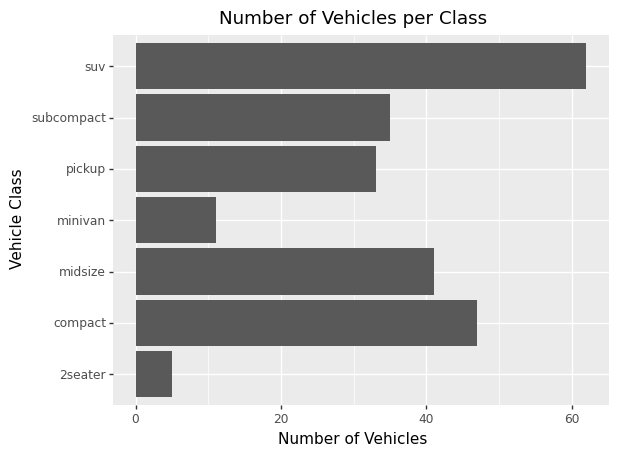

<ggplot: (121727316673)>

In [8]:
(ggplot(mpg)
 + aes(x='class')
 + geom_bar(size=20)
 + coord_flip()        # flipping the x- and y-axes
 + labs(title='Number of Vehicles per Class', x='Vehicle Class', y='Number of Vehicles') # customizing labels
)